# 박스오피스(극장)
- 데이터 기간 : 2015 ~ 2023
- 데이터 설명 : 일별 박스오피스 데이터(상업영화) + 영화 상세정보 merge

In [69]:
import pandas as pd
import numpy as np

# 경고 무시
import warnings
warnings.filterwarnings('ignore')

# 시각화 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc("font", family="AppleGothic") # 경로 설정

# 테스트
# plt.plot([1, 2, 3])
# plt.title("한글")
# plt.show()

In [70]:
df = pd.read_csv('../data/boxoffice_y_15_24_total.csv')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33780 entries, 0 to 33779
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rnum             33780 non-null  int64  
 1   rank             33780 non-null  int64  
 2   rankInten        33780 non-null  int64  
 3   rankOldAndNew    33780 non-null  object 
 4   movieCd          33780 non-null  object 
 5   movieNm          33780 non-null  object 
 6   openDt           33780 non-null  object 
 7   salesAmt         33780 non-null  int64  
 8   salesShare       33780 non-null  float64
 9   salesInten       33780 non-null  int64  
 10  salesChange      33780 non-null  float64
 11  salesAcc         33780 non-null  int64  
 12  audiCnt          33780 non-null  int64  
 13  audiInten        33780 non-null  int64  
 14  audiChange       33780 non-null  float64
 15  audiAcc          33780 non-null  int64  
 16  scrnCnt          33780 non-null  int64  
 17  showCnt     

In [72]:
df['current_date']

0        2015-01-01
1        2015-01-01
2        2015-01-01
3        2015-01-01
4        2015-01-01
            ...    
33775    2024-03-31
33776    2024-03-31
33777    2024-03-31
33778    2024-03-31
33779    2024-03-31
Name: current_date, Length: 33780, dtype: object

## 1. Preprocessing

### 시계열 변수

- 시계열변수 > datetime으로 변환

In [73]:
df['openDt'] = df['openDt'].astype(str)# float를 object로 변환

In [74]:
df['openDt'] = pd.to_datetime(df['openDt'], errors='coerce')

In [75]:
df['current_date'] = pd.to_datetime(df['current_date'])

- days_since_opening(개봉 n일) 변수 생성

In [76]:
# datetime 형식으로 변환
df['current_date'] = pd.to_datetime(df['current_date'])
df['days_since_opening'] = df['current_date'] - df['openDt'] + pd.Timedelta(days=1)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33780 entries, 0 to 33779
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   rnum                33780 non-null  int64          
 1   rank                33780 non-null  int64          
 2   rankInten           33780 non-null  int64          
 3   rankOldAndNew       33780 non-null  object         
 4   movieCd             33780 non-null  object         
 5   movieNm             33780 non-null  object         
 6   openDt              32857 non-null  datetime64[ns] 
 7   salesAmt            33780 non-null  int64          
 8   salesShare          33780 non-null  float64        
 9   salesInten          33780 non-null  int64          
 10  salesChange         33780 non-null  float64        
 11  salesAcc            33780 non-null  int64          
 12  audiCnt             33780 non-null  int64          
 13  audiInten           33780 non-n

- 첫주 주말까지 누적 관객 수

In [78]:
# 요일
df['openDt_weekday'] = df['openDt'].dt.weekday
df['current_date_weekday'] = df['current_date'].dt.weekday

In [79]:
# 'days_since_opening'이 7일 이하이고 'current_date_weekday'가 6인 행 필터링
filtered_rows = df[(df['days_since_opening'] <= pd.Timedelta(days=7)) & (df['current_date_weekday'] == 6)]

In [80]:
# 'filtered_rows'에서 'audiAcc' 열의 첫 번째 값을 가져와서 'first_until_weekday_Acc' 열에 추가
df['first_until_weekday_audiAcc'] = filtered_rows.groupby('movieCd')['audiAcc'].transform('first')
df['first_until_weekday_salesAcc'] = filtered_rows.groupby('movieCd')['salesAcc'].transform('first')

- 개봉 후 2달까지 주차별로 누적 스크린 수/누적 관객 수/누적 매출 컬럼 생성

In [81]:
for i in range(1, 9):
    # 해당 주차까지의 데이터 필터링
    filtered_df = df[df['days_since_opening'] <= pd.Timedelta(days=7) * i]
    df[f'{i}_weeks_audiAcc'] = filtered_df.groupby('movieCd')['audiAcc'].transform('first')
    df[f'{i}_weeks_salesAcc'] = filtered_df.groupby('movieCd')['salesAcc'].transform('first')

In [82]:
df.columns

Index(['rnum', 'rank', 'rankInten', 'rankOldAndNew', 'movieCd', 'movieNm',
       'openDt', 'salesAmt', 'salesShare', 'salesInten', 'salesChange',
       'salesAcc', 'audiCnt', 'audiInten', 'audiChange', 'audiAcc', 'scrnCnt',
       'showCnt', 'current_date', 'showTm', 'prdtYear', 'prdtStatNm', 'typeNm',
       'nationNm', 'genreNm', 'director', 'actor', 'showTypeGroupNm',
       'showTypeNm', 'audits', 'days_since_opening', 'openDt_weekday',
       'current_date_weekday', 'first_until_weekday_audiAcc',
       'first_until_weekday_salesAcc', '1_weeks_audiAcc', '1_weeks_salesAcc',
       '2_weeks_audiAcc', '2_weeks_salesAcc', '3_weeks_audiAcc',
       '3_weeks_salesAcc', '4_weeks_audiAcc', '4_weeks_salesAcc',
       '5_weeks_audiAcc', '5_weeks_salesAcc', '6_weeks_audiAcc',
       '6_weeks_salesAcc', '7_weeks_audiAcc', '7_weeks_salesAcc',
       '8_weeks_audiAcc', '8_weeks_salesAcc'],
      dtype='object')

### 데이터 재구성

In [83]:
agg_df = df.groupby('movieNm').agg({
    'movieCd': 'first',  # 영화 구분 코드
    'openDt': 'first',  # 개봉일
    'salesAcc': 'max',  # 누적 매출
    'audiAcc': 'max',  # 누적 매출
    'scrnCnt': 'sum',  # 스크린 수 합산
    'showTm': 'first',  # 상영시간
    'typeNm': 'first',  # 타입
    'nationNm': 'first',  # 국가
    'genreNm': 'first',  # 장르
    'director': 'first',  # 감독
    'actor': 'first',  # 배우
    'showTypeGroupNm': 'first',  # 상영 타입 _그룹
    'showTypeNm': 'first',  # 상영 타입
    'audits': 'first',  # 관람가
    'first_until_weekday_audiAcc': 'first',
    'first_until_weekday_salesAcc': 'first',
    '1_weeks_audiAcc': 'first',
    '1_weeks_salesAcc': 'first',
    '2_weeks_audiAcc': 'first',
    '2_weeks_salesAcc': 'first',
    '3_weeks_audiAcc': 'first',
    '3_weeks_salesAcc': 'first',
    '4_weeks_audiAcc': 'first',
    '4_weeks_salesAcc': 'first',
    '5_weeks_audiAcc': 'first',
    '5_weeks_salesAcc': 'first',
    '6_weeks_audiAcc': 'first',
    '6_weeks_salesAcc': 'first',
    '7_weeks_audiAcc': 'first',
    '7_weeks_salesAcc': 'first',
    '8_weeks_audiAcc': 'first',
    '8_weeks_salesAcc': 'first'
}).reset_index()


In [84]:
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2770 entries, 0 to 2769
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   movieNm                       2770 non-null   object        
 1   movieCd                       2770 non-null   object        
 2   openDt                        2536 non-null   datetime64[ns]
 3   salesAcc                      2770 non-null   int64         
 4   audiAcc                       2770 non-null   int64         
 5   scrnCnt                       2770 non-null   int64         
 6   showTm                        941 non-null    float64       
 7   typeNm                        940 non-null    object        
 8   nationNm                      941 non-null    object        
 9   genreNm                       940 non-null    object        
 10  director                      900 non-null    object        
 11  actor                         

In [85]:
agg_df.head()

,movieNm,movieCd,openDt,salesAcc,audiAcc,scrnCnt,showTm,typeNm,nationNm,genreNm,...,4_weeks_audiAcc,4_weeks_salesAcc,5_weeks_audiAcc,5_weeks_salesAcc,6_weeks_audiAcc,6_weeks_salesAcc,7_weeks_audiAcc,7_weeks_salesAcc,8_weeks_audiAcc,8_weeks_salesAcc
0,#아이엠히어,20197277,2021-01-14,132257040,15822,2642,97.0,장편,프랑스,멜로/로맨스,...,2443.0,19219930.0,2443.0,19219930.0,2443.0,19219930.0,2443.0,19219930.0,2443.0,19219930.0
1,007 살인번호,19628012,NaT,26955000,13180,8,110.0,장편,영국,액션,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,007 제2편 : 위기일발,19638016,1973-09-21,14158000,7032,2,NaN,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"10,000km(만 킬로미터)",20152001,2015-07-16,3515000,463,1,NaN,None,None,None,...,463.0,3515000.0,463.0,3515000.0,463.0,3515000.0,463.0,3515000.0,463.0,3515000.0
4,100% 울프: 푸들이 될 순 없어,20202128,2020-12-24,128333330,16204,2603,95.0,장편,호주,애니메이션,...,203.0,1827000.0,203.0,1827000.0,203.0,1827000.0,203.0,1827000.0,203.0,1827000.0


## 2. 데이터 전처리

### 분포 확인

#### 수치형 변수 분포 확인(누적 매출, 누적 관객 수, 누적 스크린 수) > 이상치

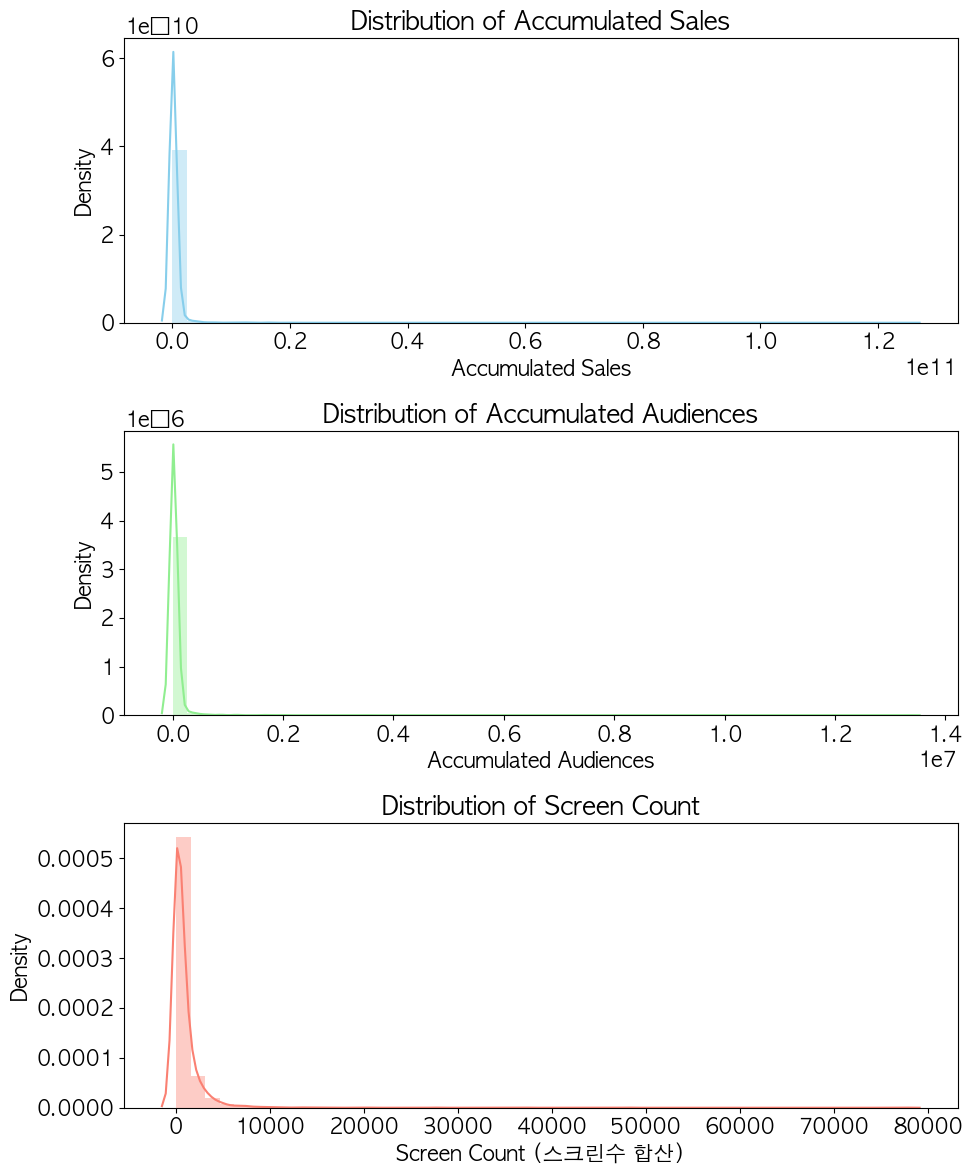

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# 누적 매출
sns.distplot(agg_df['salesAcc'], ax=axes[0], color='skyblue')
axes[0].set_xlabel('Accumulated Sales')
axes[0].set_title('Distribution of Accumulated Sales')

# 관객 수 누적
sns.distplot(agg_df['audiAcc'], ax=axes[1], color='lightgreen')
axes[1].set_xlabel('Accumulated Audiences')
axes[1].set_title('Distribution of Accumulated Audiences')

# 스크린 수 누적
sns.distplot(agg_df['scrnCnt'], ax=axes[2], color='salmon')
axes[2].set_xlabel('Screen Count (스크린수 합산)')
axes[2].set_title('Distribution of Screen Count')

# 그래프 간 간격 조절
plt.tight_layout()

# 그래프 출력
plt.show()


#### 상영 시간 분포

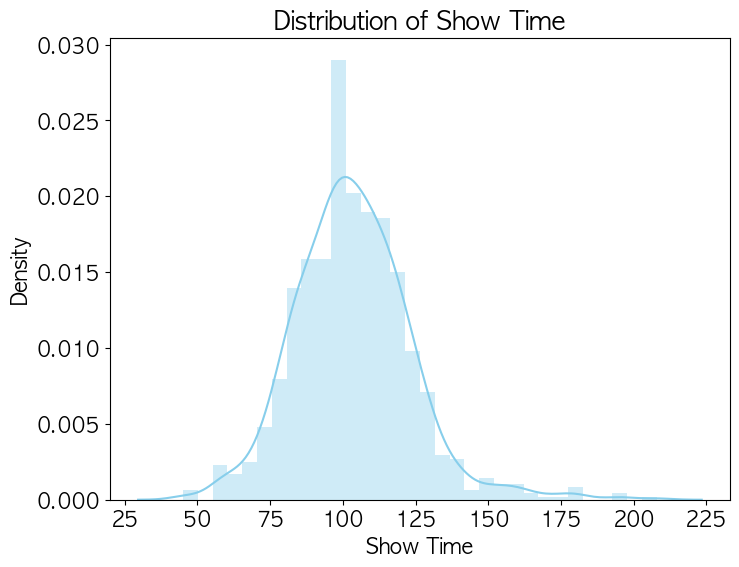

In [87]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.distplot(agg_df['showTm'], color='skyblue', ax=ax)
ax.set_xlabel('Show Time')
ax.set_ylabel('Density')
ax.set_title('Distribution of Show Time')
plt.show()

#### 범주형 변수 분포 (타입, 국가, 장르, 상영타입)   

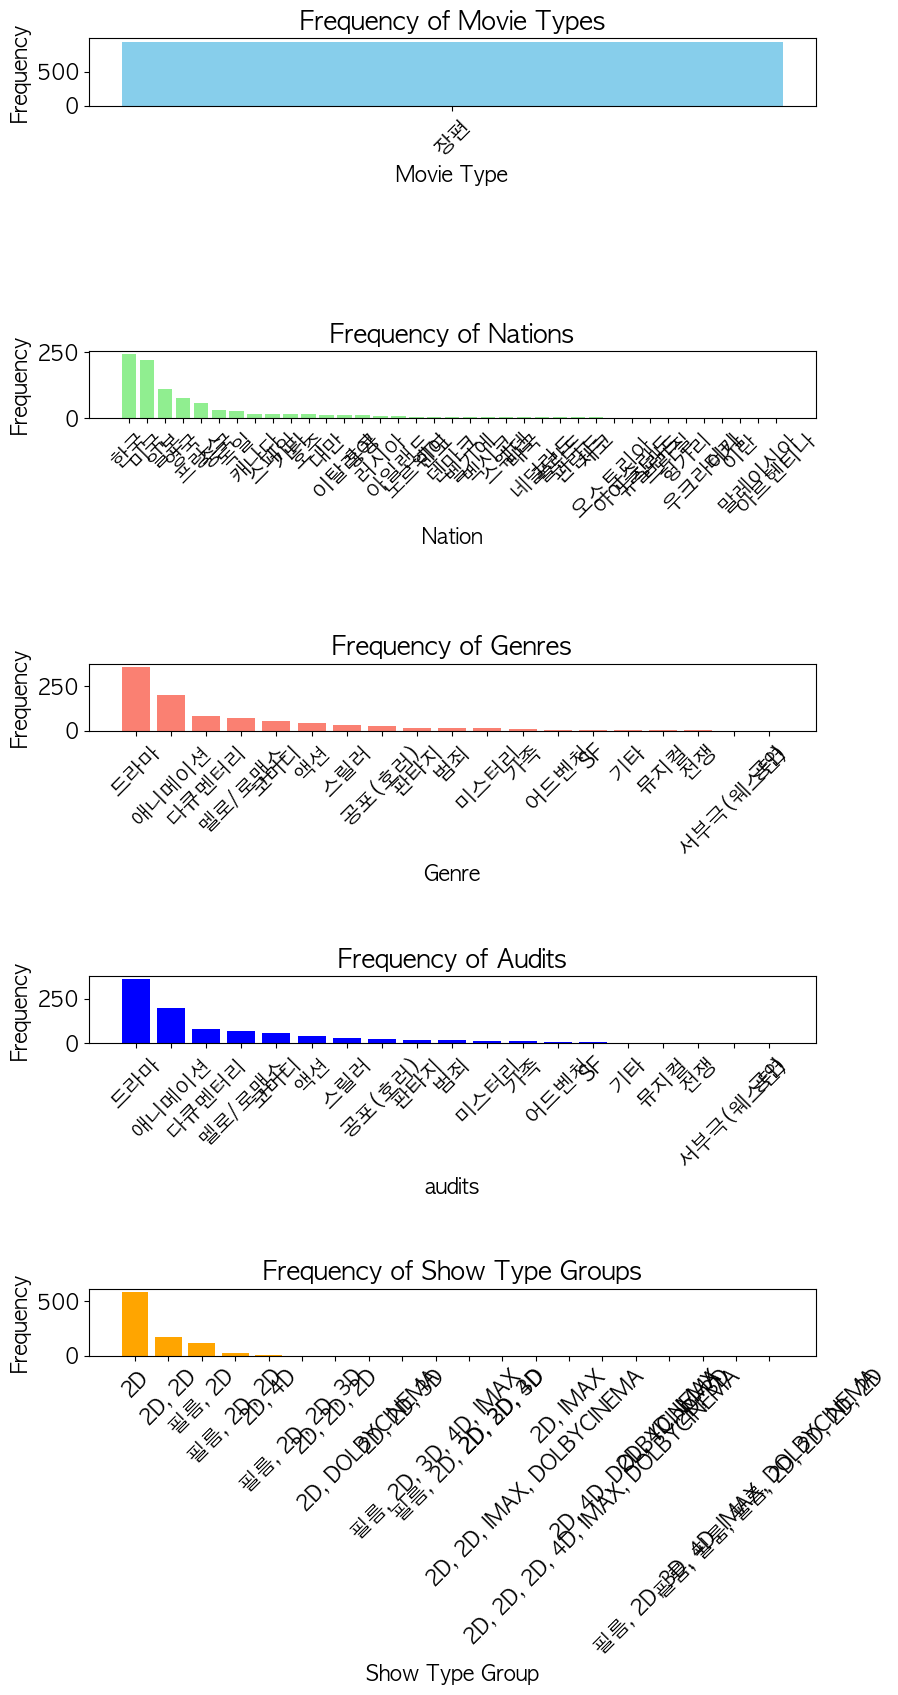

In [88]:
import matplotlib.pyplot as plt

# Figure와 Axes 생성
fig, axes = plt.subplots(5, 1, figsize=(10, 18))

# 'typeNm' 열의 카운트 플롯
type_counts = agg_df['typeNm'].value_counts()
axes[0].bar(type_counts.index, type_counts.values, color='skyblue')
axes[0].set_xlabel('Movie Type')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Movie Types')
axes[0].tick_params(axis='x', rotation=45)

# 'nationNm' 열의 카운트 플롯
nation_counts = agg_df['nationNm'].value_counts()
axes[1].bar(nation_counts.index, nation_counts.values, color='lightgreen')
axes[1].set_xlabel('Nation')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of Nations')
axes[1].tick_params(axis='x', rotation=45)

# 'genreNm' 열의 카운트 플롯
genre_counts = agg_df['genreNm'].value_counts()
axes[2].bar(genre_counts.index, genre_counts.values, color='salmon')
axes[2].set_xlabel('Genre')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Frequency of Genres')
axes[2].tick_params(axis='x', rotation=45)

audits_counts = agg_df['audits'].value_counts()
axes[3].bar(genre_counts.index, genre_counts.values, color='blue')
axes[3].set_xlabel('audits')
axes[3].set_ylabel('Frequency')
axes[3].set_title('Frequency of Audits')
axes[3].tick_params(axis='x', rotation=45)

# 'showTypeGroupNm' 열의 카운트 플롯
showTypeGroup_counts = agg_df['showTypeGroupNm'].value_counts()
axes[4].bar(showTypeGroup_counts.index, showTypeGroup_counts.values, color='orange')
axes[4].set_xlabel('Show Type Group')
axes[4].set_ylabel('Frequency')
axes[4].set_title('Frequency of Show Type Groups')
axes[4].tick_params(axis='x', rotation=45)

# 그래프 간 간격 조절
plt.tight_layout(pad=3.0)

# 그래프 출력
plt.show()


showtypegroup 전처리/인코딩 필요 > 지원하는 상영 타입 / IMAX 상영여부 / 돌비시네마 상영 여부 / 스크린 엑스 상영여부 등으로 원핫인코딩

#### 상영 타입 > 원핫 인코딩(1,0)

In [89]:
# None 값이 아닌 것만 필터링하고 쉼표로 분할하여 유니크한 값 추출
unique_show_types = set(item.strip() for sublist in agg_df['showTypeGroupNm'] if sublist is not None for item in sublist.split(','))

In [90]:
# 상영 타입에 따라 컬럼 생성 > 존재하면 1, 존재하지 않으면 0부여
for show_type in unique_show_types:
    agg_df[show_type] = agg_df['showTypeGroupNm'].apply(lambda x: 1 if isinstance(x, str) and show_type in x.split(', ') else 0)

In [91]:
agg_df['4D'].head() # 테스트

0    0
1    0
2    0
3    0
4    0
Name: 4D, dtype: int64

## 3. EDA

### 시계열 지표 EDA

In [93]:
df1 = pd.read_csv('../data/boxoffice_15_23_total.csv') # 23년까지 전체
df2 = pd.read_csv('../data/boxoffice_y_15_24_total.csv') # 24년까지 상업영화만

In [95]:
openDt_sales = df1[['current_date', 'salesAmt','audiCnt']]
sales_by_date = openDt_sales.groupby('current_date').sum()
sales_by_date.reset_index(inplace=True)
sales_by_date['current_date'] = pd.to_datetime(sales_by_date['current_date'])
sales_by_date.set_index('current_date', inplace = True)

# 관객 수 대비 매출액 컬럼 생성
sales_by_date['sales_per_audi'] = sales_by_date['salesAmt'] / sales_by_date['audiCnt']

## ------------------------
openDt_sales_y = df2[['current_date', 'salesAmt','audiCnt']]
sales_by_date_y = openDt_sales_y.groupby('current_date').sum()
sales_by_date_y.reset_index(inplace=True)
sales_by_date_y['current_date'] = pd.to_datetime(sales_by_date_y['current_date'])
sales_by_date_y.set_index('current_date', inplace = True)

# 관객 수 대비 매출액 컬럼 생성
sales_by_date_y['sales_per_audi'] = sales_by_date_y['salesAmt'] / sales_by_date_y['audiCnt']

In [96]:
def plot_sales_by(sales_by,col, title):

    fig, ax = plt.subplots(figsize=(20, 6))

    ax.plot(sales_by.index, sales_by[col])
    ax.set_title(title)
    ax.set_xlabel('opening date')
    ax.set_ylabel('Sales')

    plt.show()

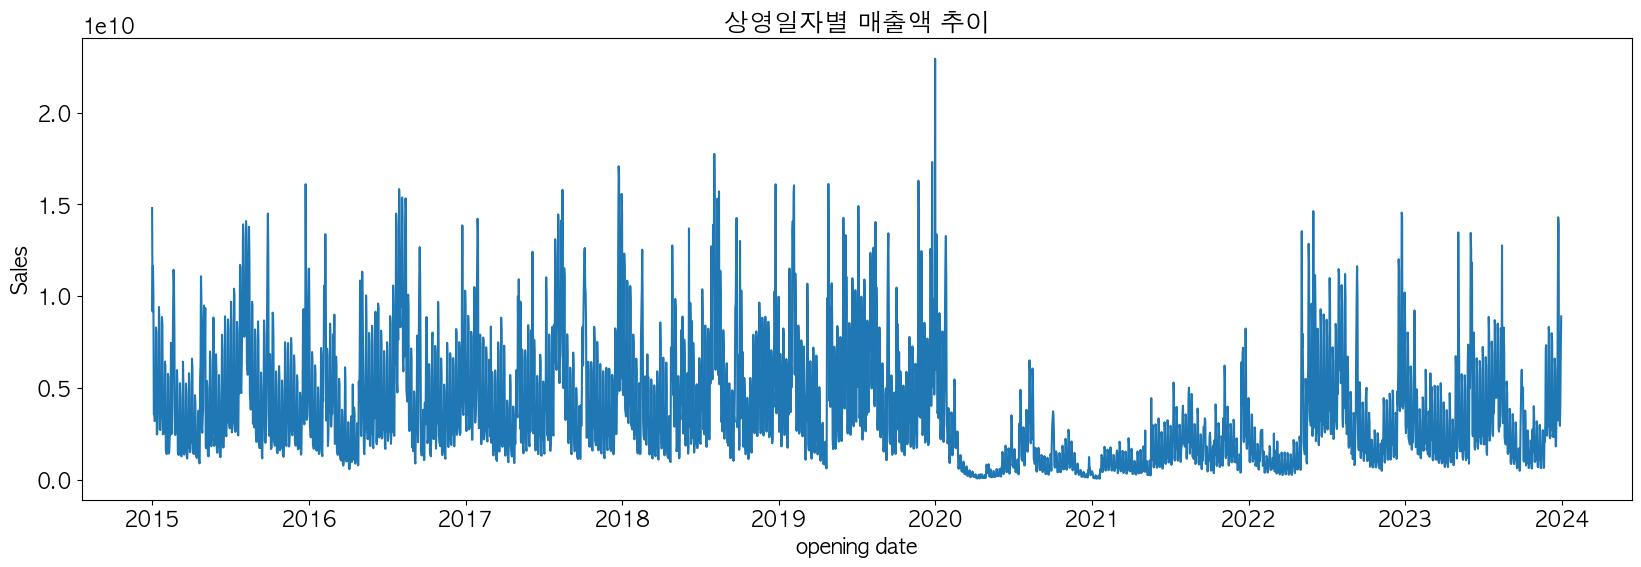

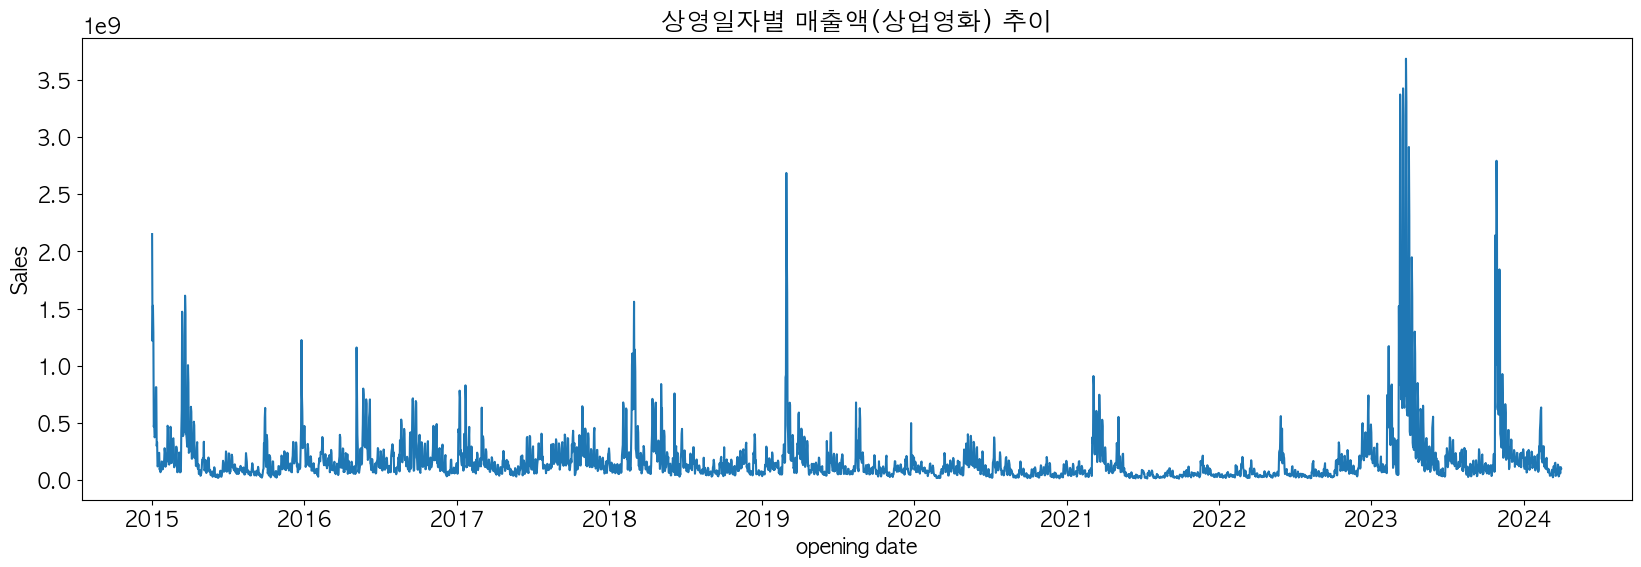

In [99]:
plot_sales_by(sales_by_date,'salesAmt','상영일자별 매출액 추이')
plot_sales_by(sales_by_date_y,'salesAmt','상영일자별 매출액(상업영화) 추이')

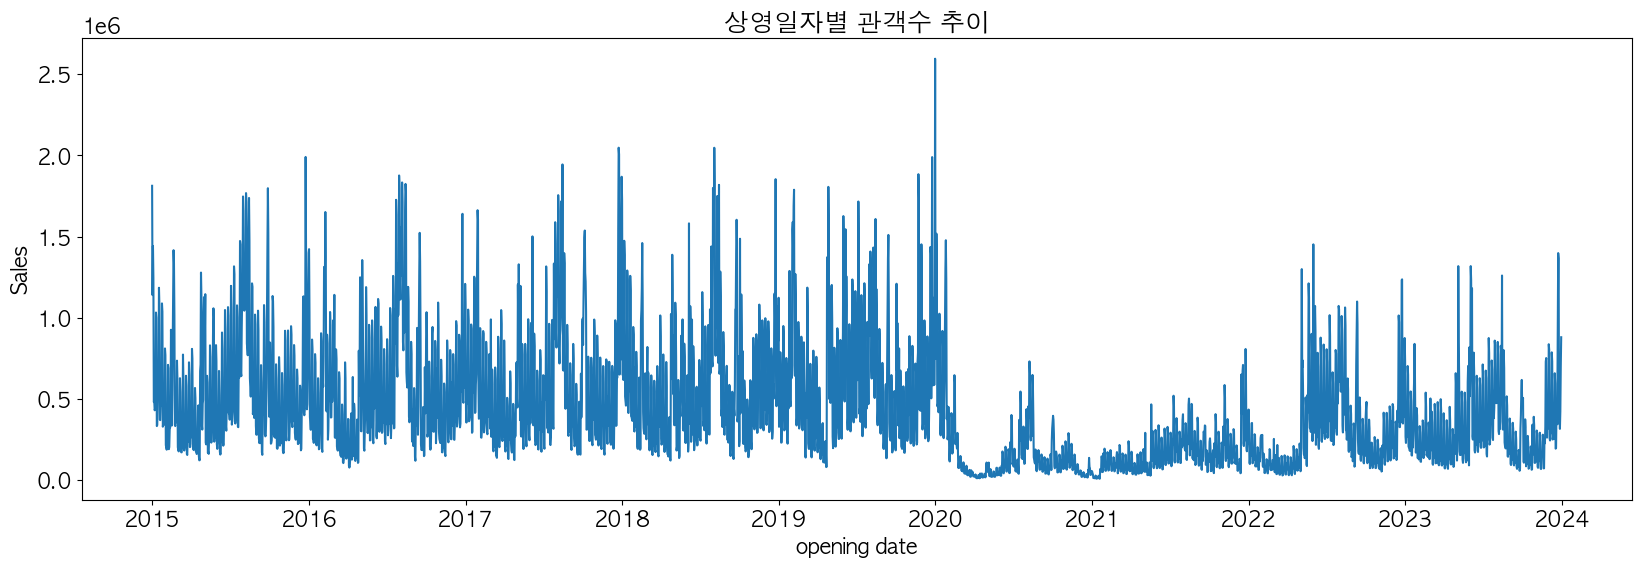

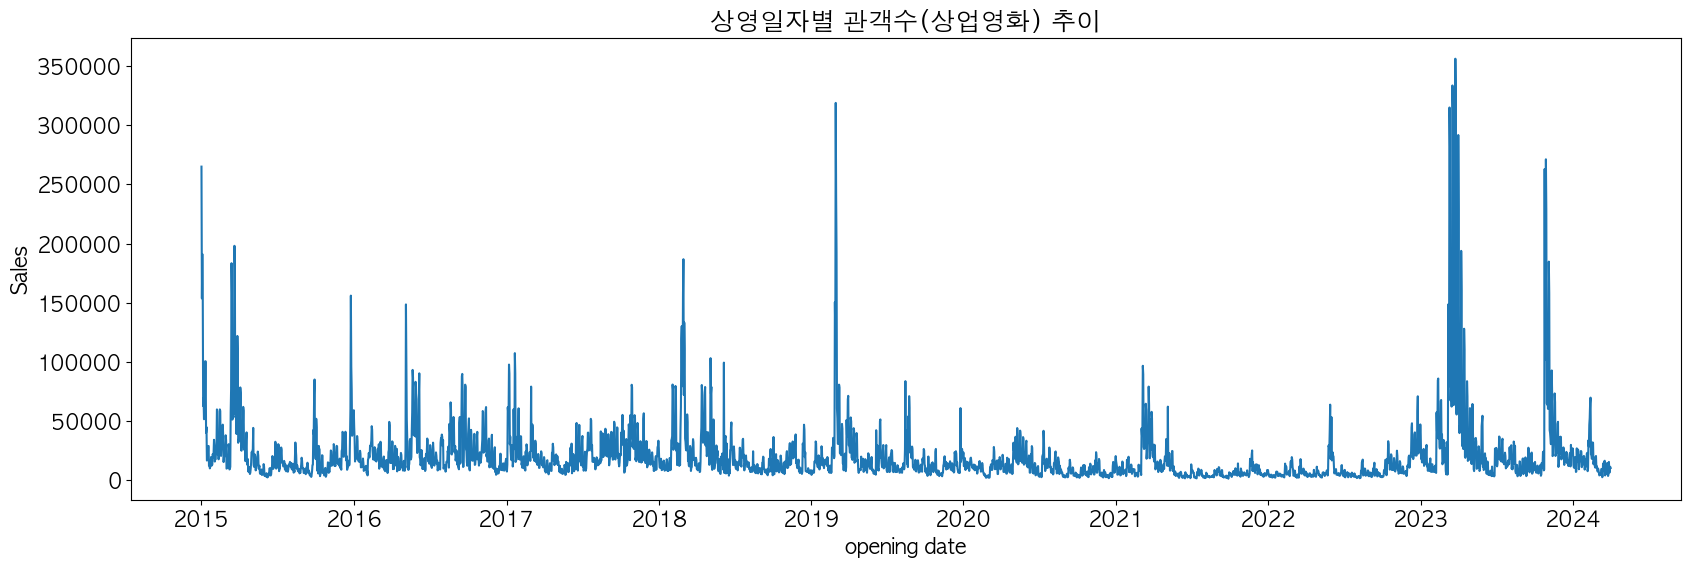

In [100]:
plot_sales_by(sales_by_date,'audiCnt','상영일자별 관객수 추이')
plot_sales_by(sales_by_date_y,'audiCnt','상영일자별 관객수(상업영화) 추이')

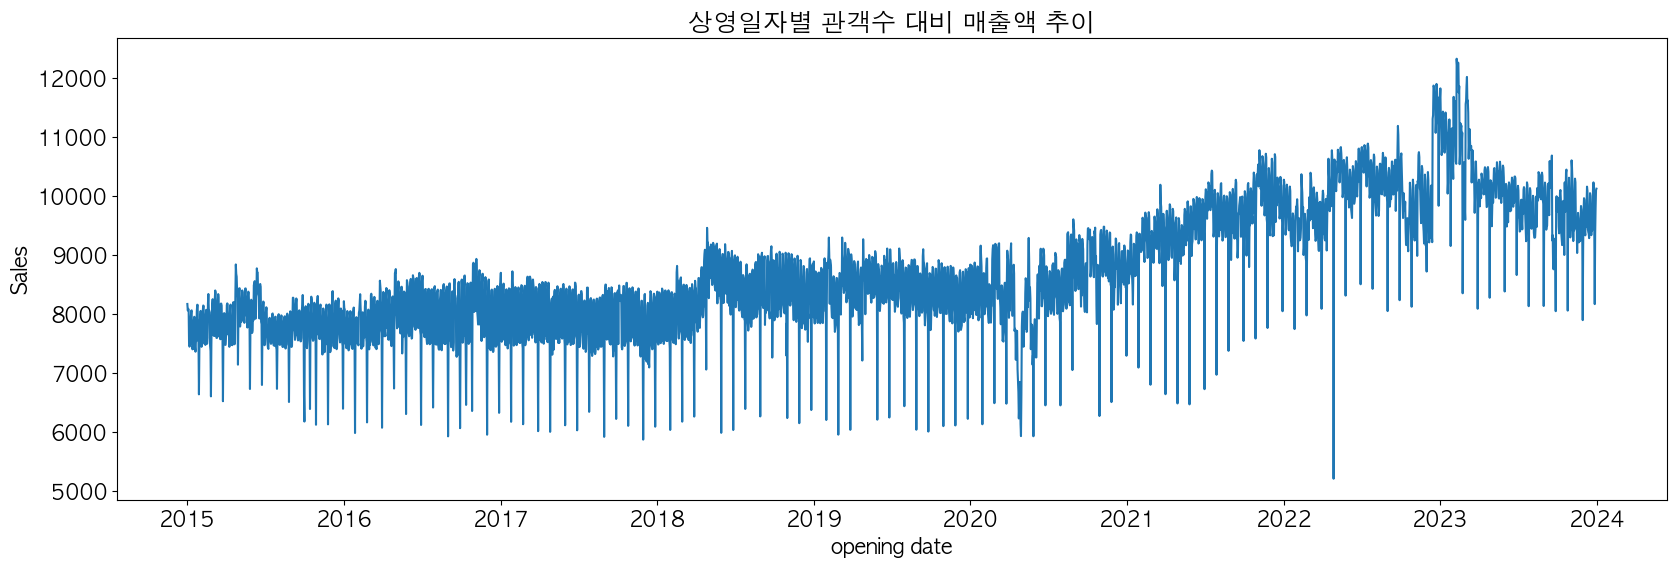

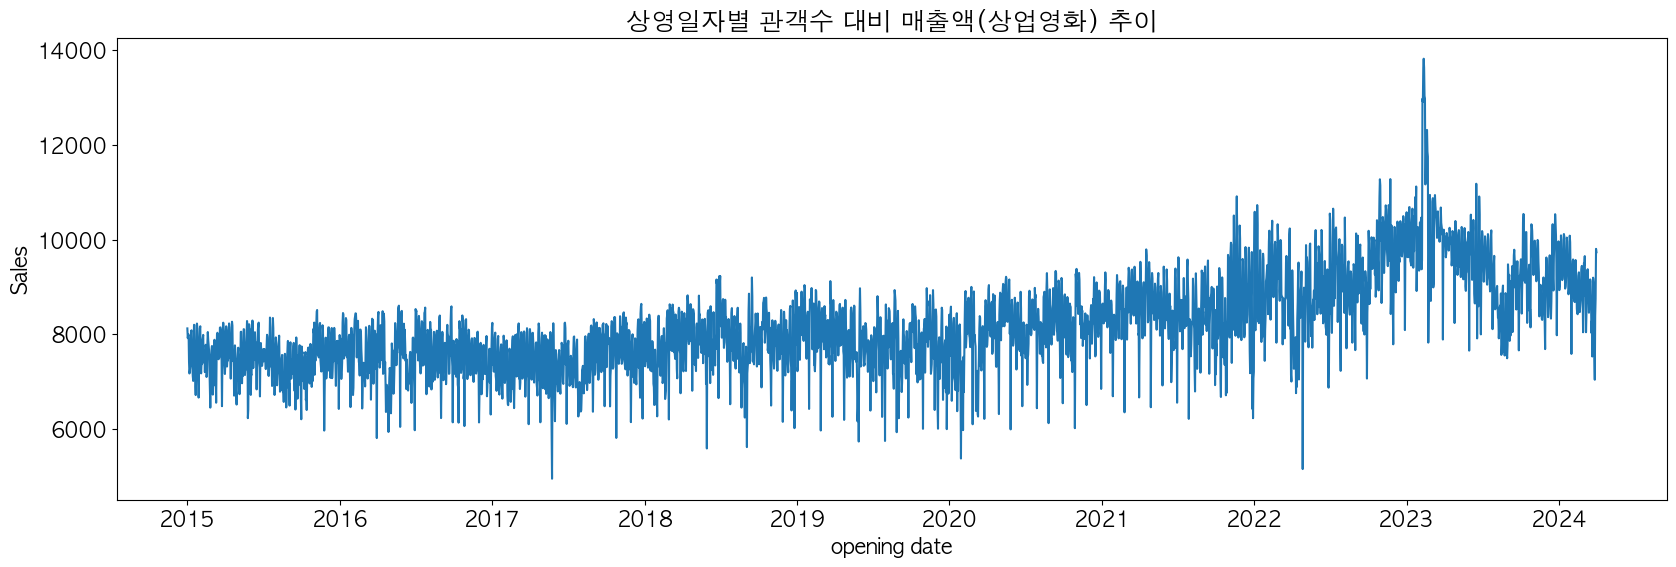

In [101]:
plot_sales_by(sales_by_date,'sales_per_audi','상영일자별 관객수 대비 매출액 추이') 
plot_sales_by(sales_by_date_y,'sales_per_audi','상영일자별 관객수 대비 매출액(상업영화) 추이') 

특정 시점에 티켓 가격 인상 혹은 특별관을 늘렸을 수 있음

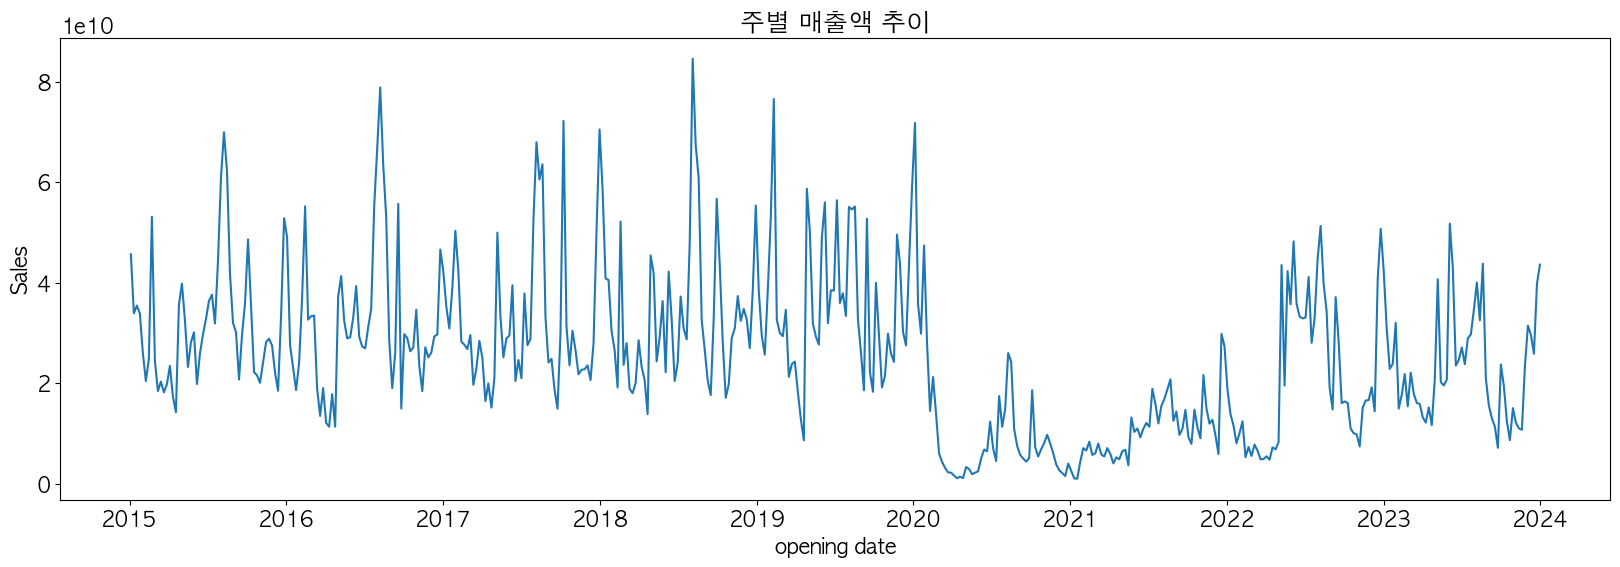

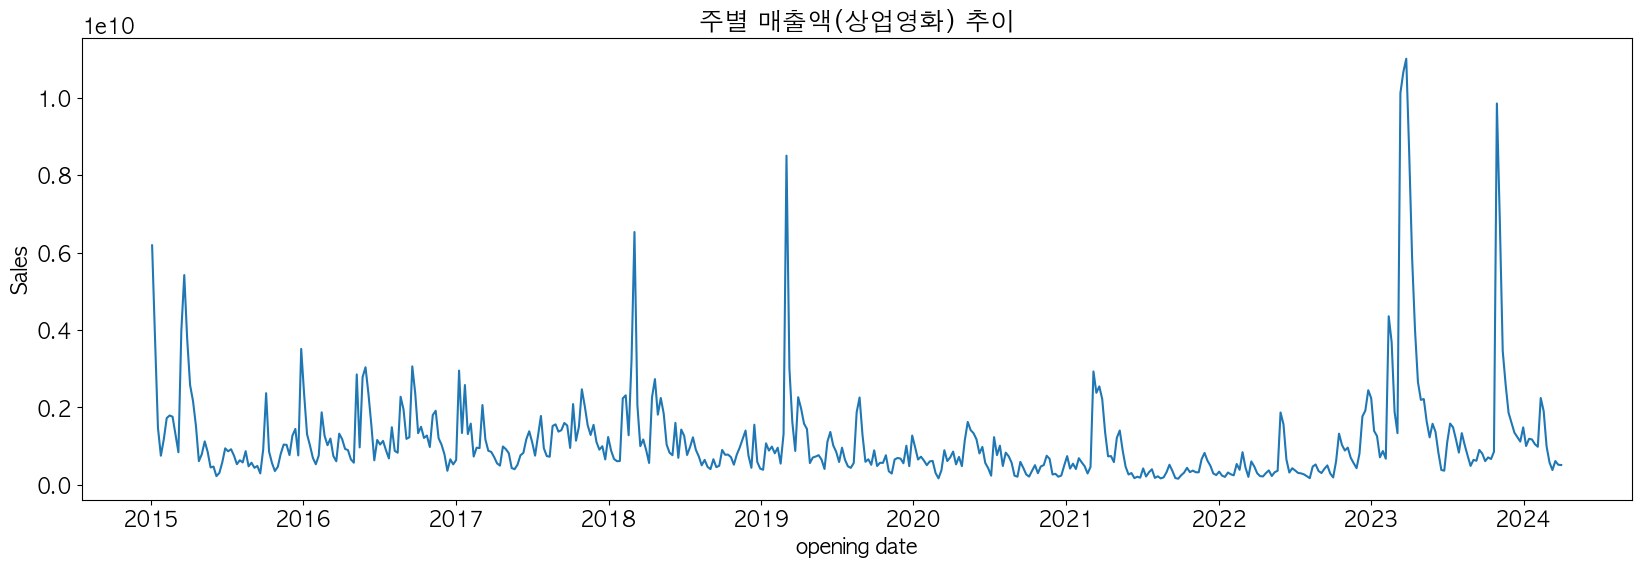

In [103]:
sales_by_week = sales_by_date.resample('W').sum()
sales_by_week_y = sales_by_date_y.resample('W').sum()

plot_sales_by(sales_by_week,'salesAmt','주별 매출액 추이')
plot_sales_by(sales_by_week_y,'salesAmt','주별 매출액(상업영화) 추이')

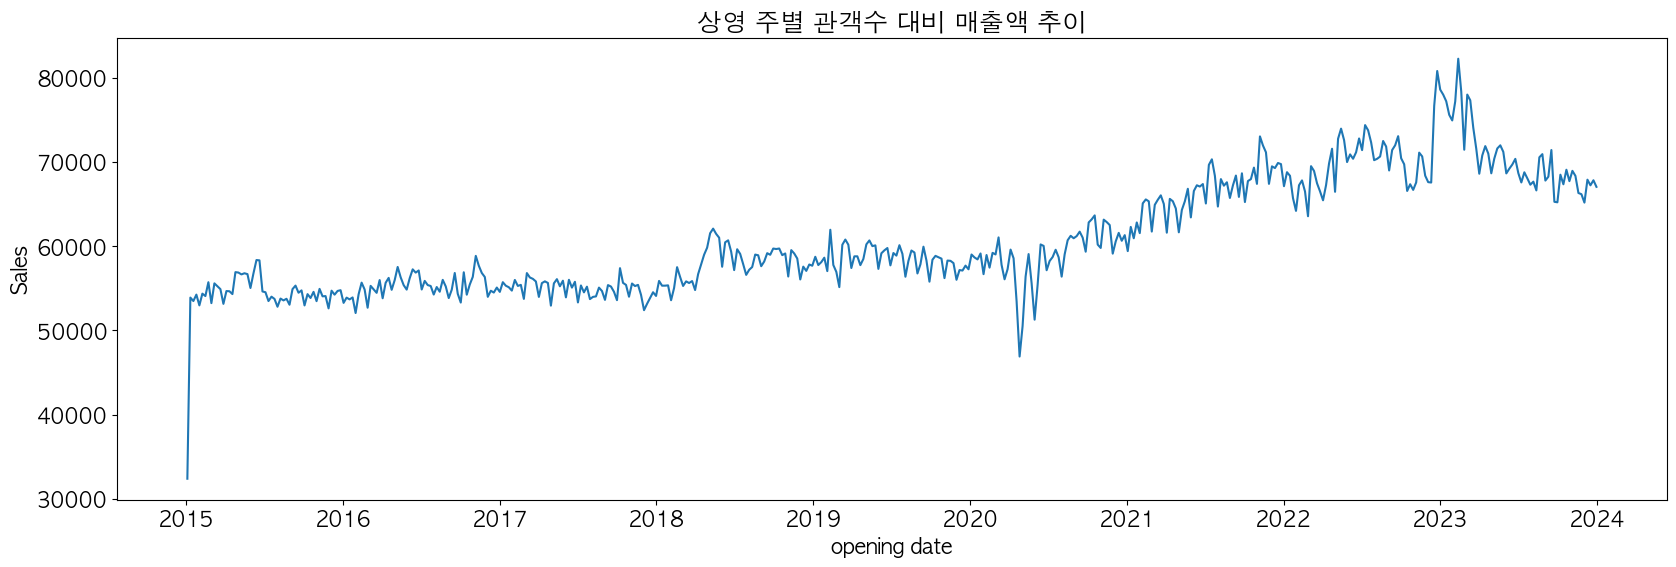

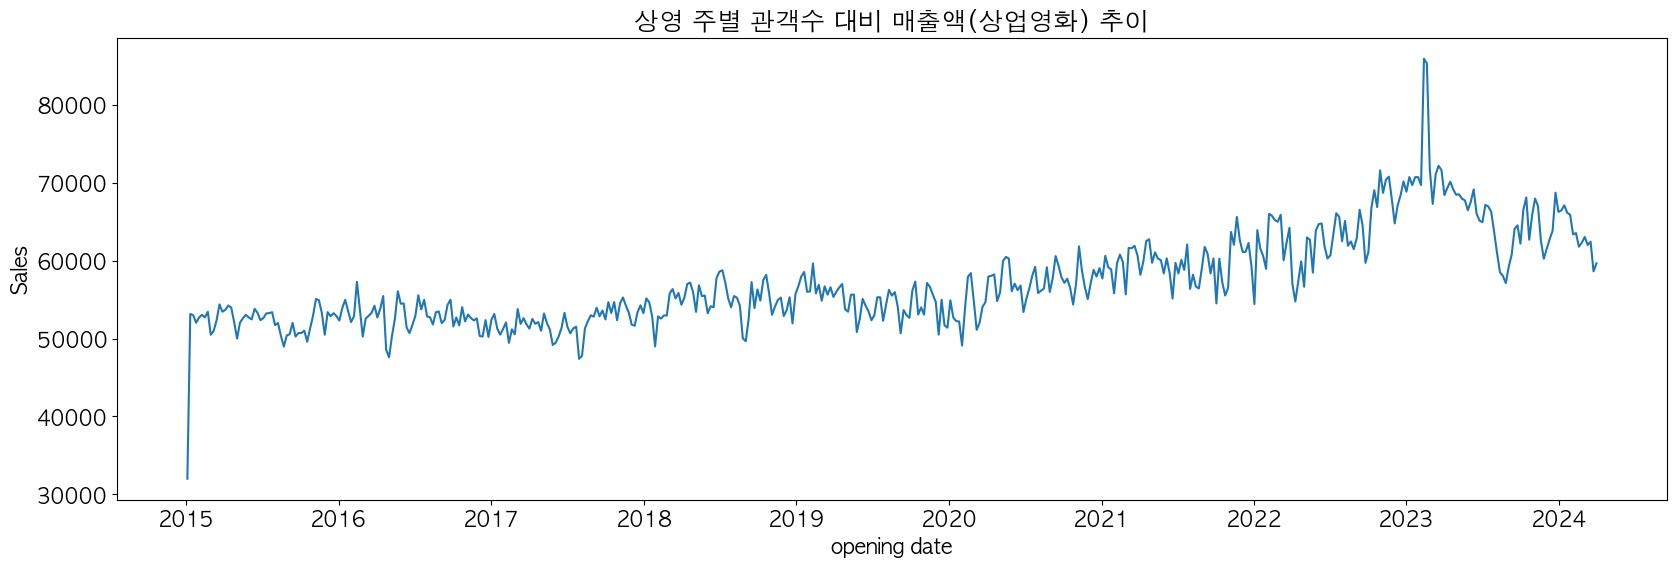

In [104]:
plot_sales_by(sales_by_week,'sales_per_audi','상영 주별 관객수 대비 매출액 추이')
plot_sales_by(sales_by_week_y,'sales_per_audi','상영 주별 관객수 대비 매출액(상업영화) 추이')

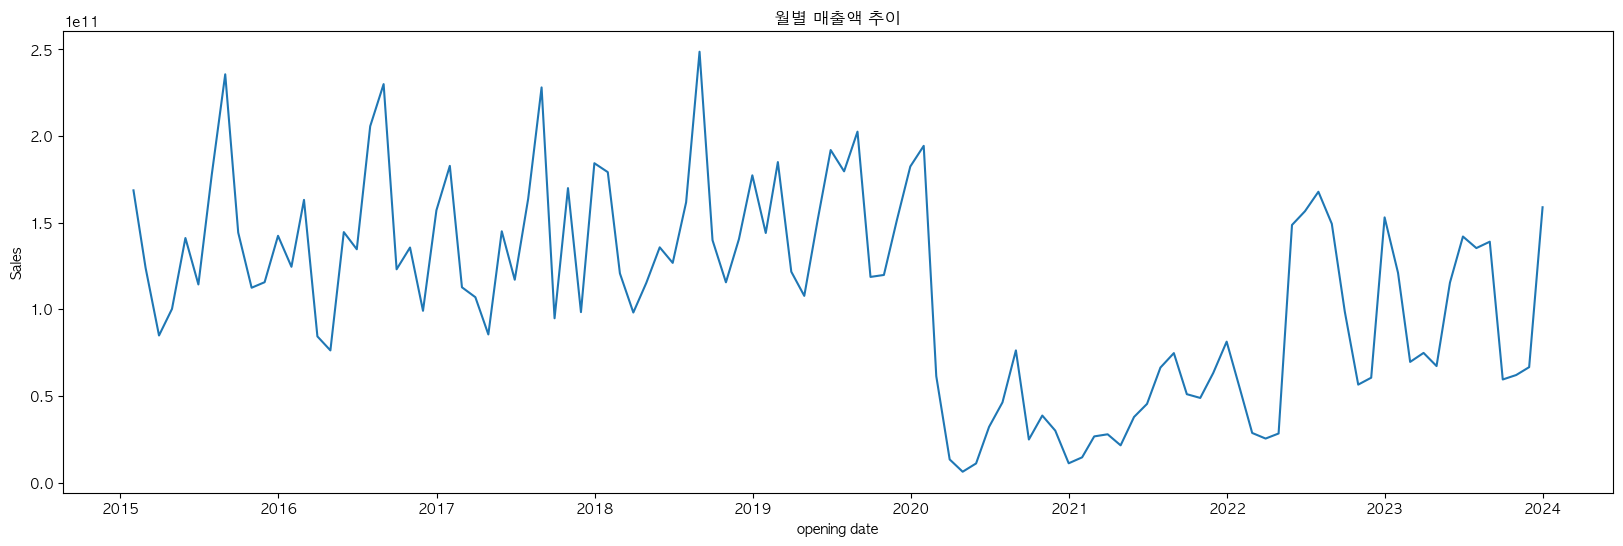

In [42]:
sales_by_month = sales_by_date.resample('M').sum()
plot_sales_by_week(sales_by_month,'salesAmt','월별 매출액 추이')

COVID19 기점으로 관객수/매출액 큰폭으로 감소

### 시계열 분해

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime

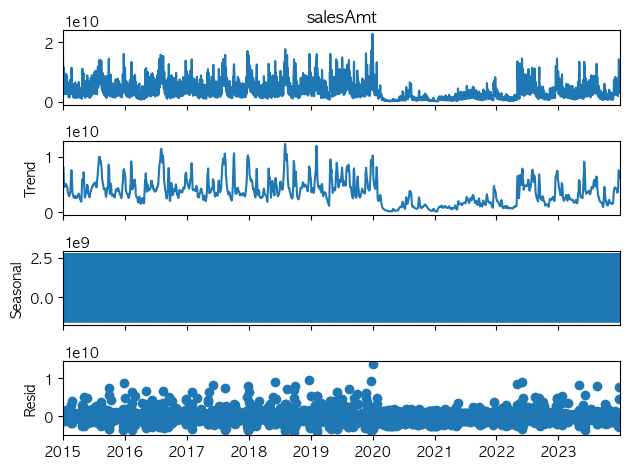

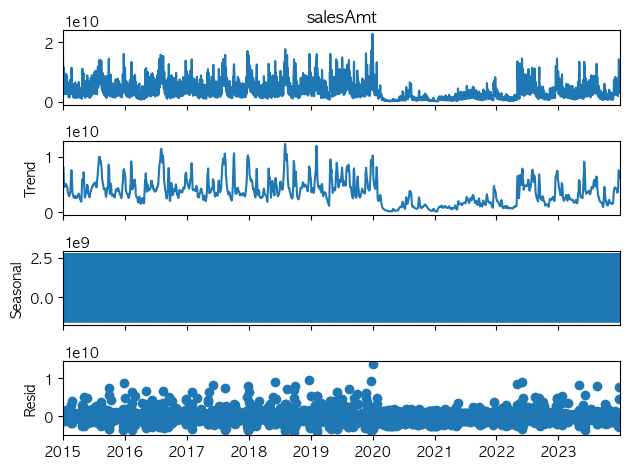

In [44]:
result = seasonal_decompose(sales_by_date['salesAmt'], model='additive')
result.plot()

In [45]:
# 추세 계산
trend_slope = (result.trend.iloc[-1] - result.trend.iloc[0]) / len(result.trend)
print("Trend slope:", trend_slope)

# 계절성 성분의 주기와 평균값 계산
seasonality_period = result.seasonal.index.freq
seasonality_mean = result.seasonal.mean()
print("Seasonality period:", seasonality_period)
print("Seasonality mean:", seasonality_mean)


Trend slope: nan
Seasonality period: None
Seasonality mean: 1099168.1653484434


#### 2020년 이전 데이터 시계열 분해

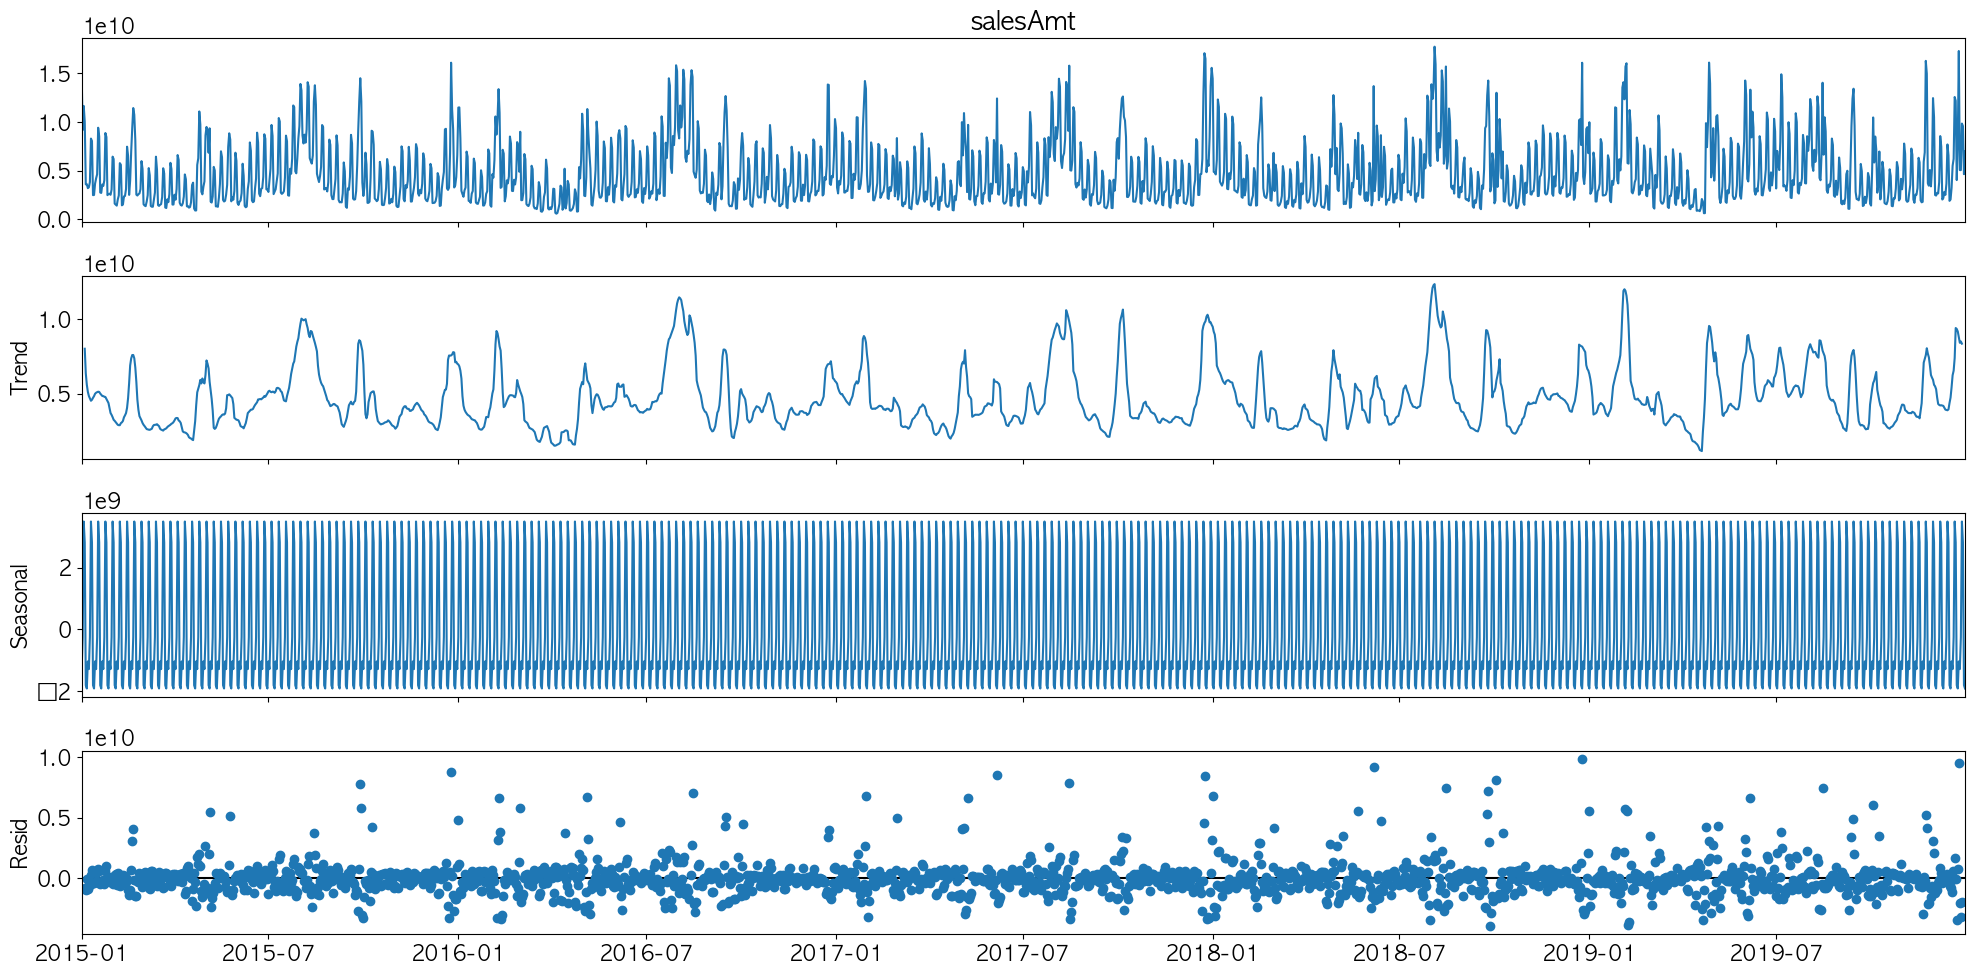

In [105]:
# 2020년 이전 데이터 선택(Covid 이전)
pre_2020_data = sales_by_date.loc[:'2019-12-31']
result = seasonal_decompose(pre_2020_data ['salesAmt'], model='additive')
result.plot()
plt.show()

#### 월별 시계열 분해

In [111]:
# 월별 리샘플링
monthly_sales = sales_by_date.resample('M').sum()
monthly_sales_y = sales_by_date_y.resample('M').sum()

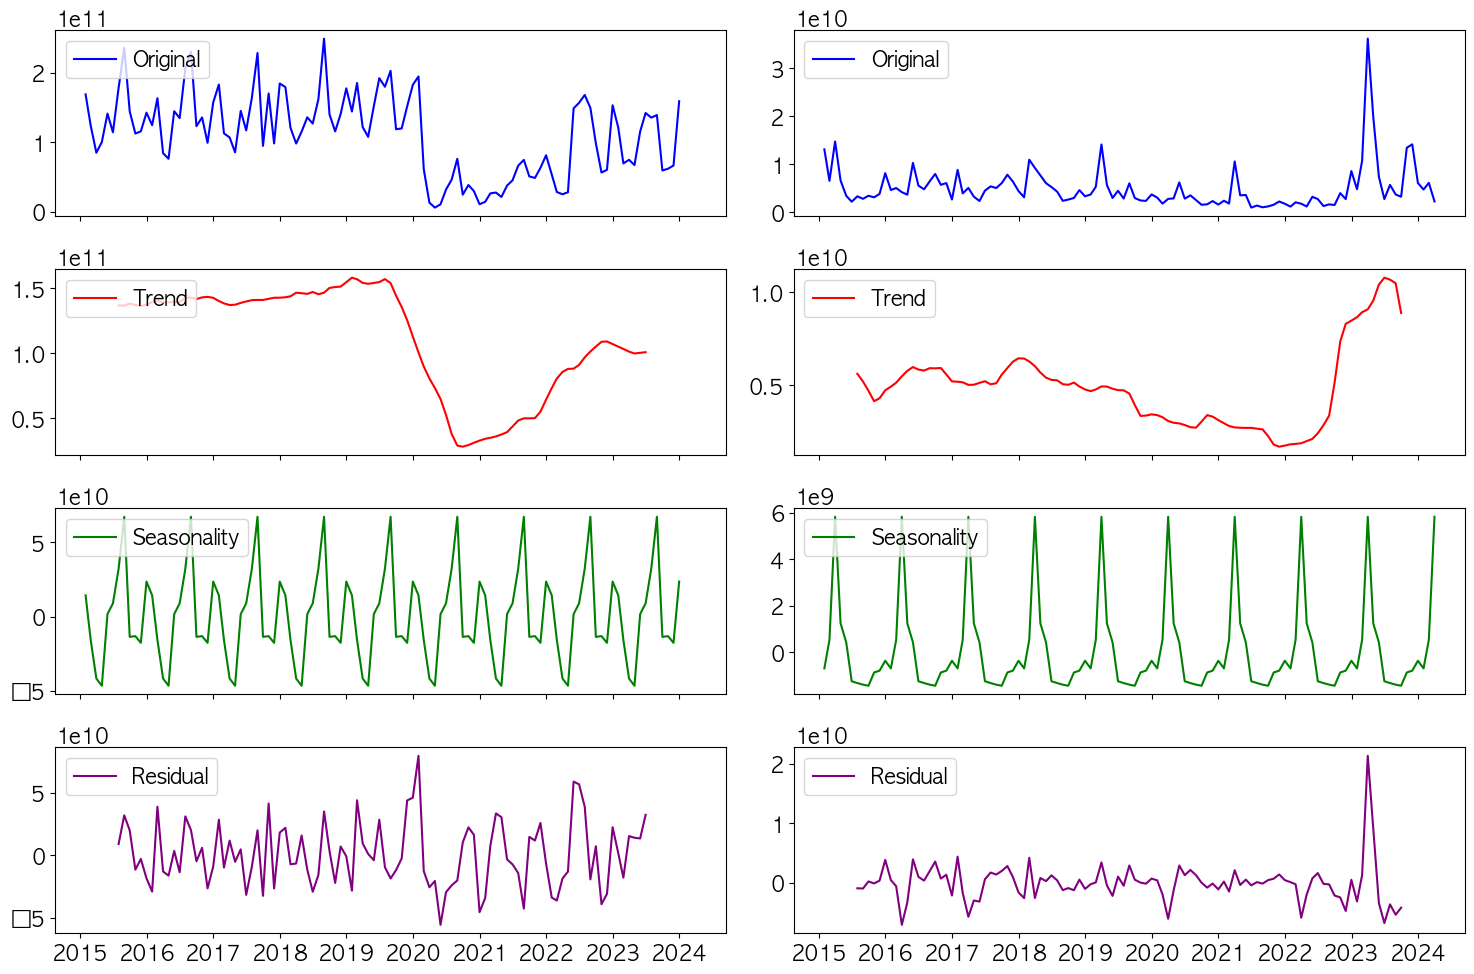

In [113]:
# 두 개의 시계열 데이터에 대해 분해
result = sm.tsa.seasonal_decompose(monthly_sales['salesAmt'], model='additive')
result_y = sm.tsa.seasonal_decompose(monthly_sales_y['salesAmt'], model='additive')

# 시각화
fig, axes = plt.subplots(4, 2, figsize=(15, 10), sharex=True)

# 원본 데이터
axes[0, 0].plot(monthly_sales.index, monthly_sales['salesAmt'], label='Original', color='blue')
axes[0, 0].legend(loc='upper left')
axes[0, 1].plot(monthly_sales_y.index, monthly_sales_y['salesAmt'], label='Original', color='blue')
axes[0, 1].legend(loc='upper left')

# 추세 (Trend)
axes[1, 0].plot(monthly_sales.index, result.trend, label='Trend', color='red')
axes[1, 0].legend(loc='upper left')
axes[1, 1].plot(monthly_sales_y.index, result_y.trend, label='Trend', color='red')
axes[1, 1].legend(loc='upper left')

# 계절성 (Seasonality)
axes[2, 0].plot(monthly_sales.index, result.seasonal, label='Seasonality', color='green')
axes[2, 0].legend(loc='upper left')
axes[2, 1].plot(monthly_sales_y.index, result_y.seasonal, label='Seasonality', color='green')
axes[2, 1].legend(loc='upper left')

# 잔차 (Residual)
axes[3, 0].plot(monthly_sales.index, result.resid, label='Residual', color='purple')
axes[3, 0].legend(loc='upper left')
axes[3, 1].plot(monthly_sales_y.index, result_y.resid, label='Residual', color='purple')
axes[3, 1].legend(loc='upper left')

plt.tight_layout()
plt.show()


In [108]:
import scipy
import signal

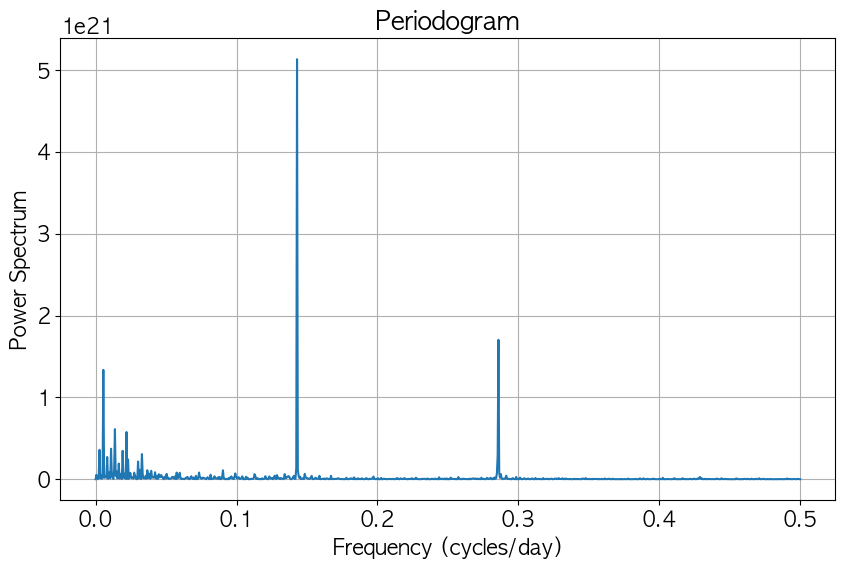

Dominant Period: 6.996168582375479


In [109]:
from scipy.signal import periodogram, find_peaks
import matplotlib.pyplot as plt
import numpy as np

# 주기그램 생성
frequencies, power_spectrum = periodogram(pre_2020_data['salesAmt'])

# 주기그램 플로팅
plt.figure(figsize=(10, 6))
plt.plot(frequencies, power_spectrum)
plt.title('Periodogram')
plt.xlabel('Frequency (cycles/day)')
plt.ylabel('Power Spectrum')
plt.grid(True)
plt.show()

# 가장 강한 주기성 출력
peaks, _ = find_peaks(power_spectrum)
strongest_peak = np.argmax(power_spectrum[peaks])
dominant_frequency = frequencies[peaks[strongest_peak]]
dominant_period = 1 / dominant_frequency
print("Dominant Period:", dominant_period)


코로나 이전, 가장 강한 주기성 6.9일로 관찰됨 > 주말과 평일 간의 매출/관객 수 패턴의 차이가 존재할 수 있음

### IQR 이상치 탐지

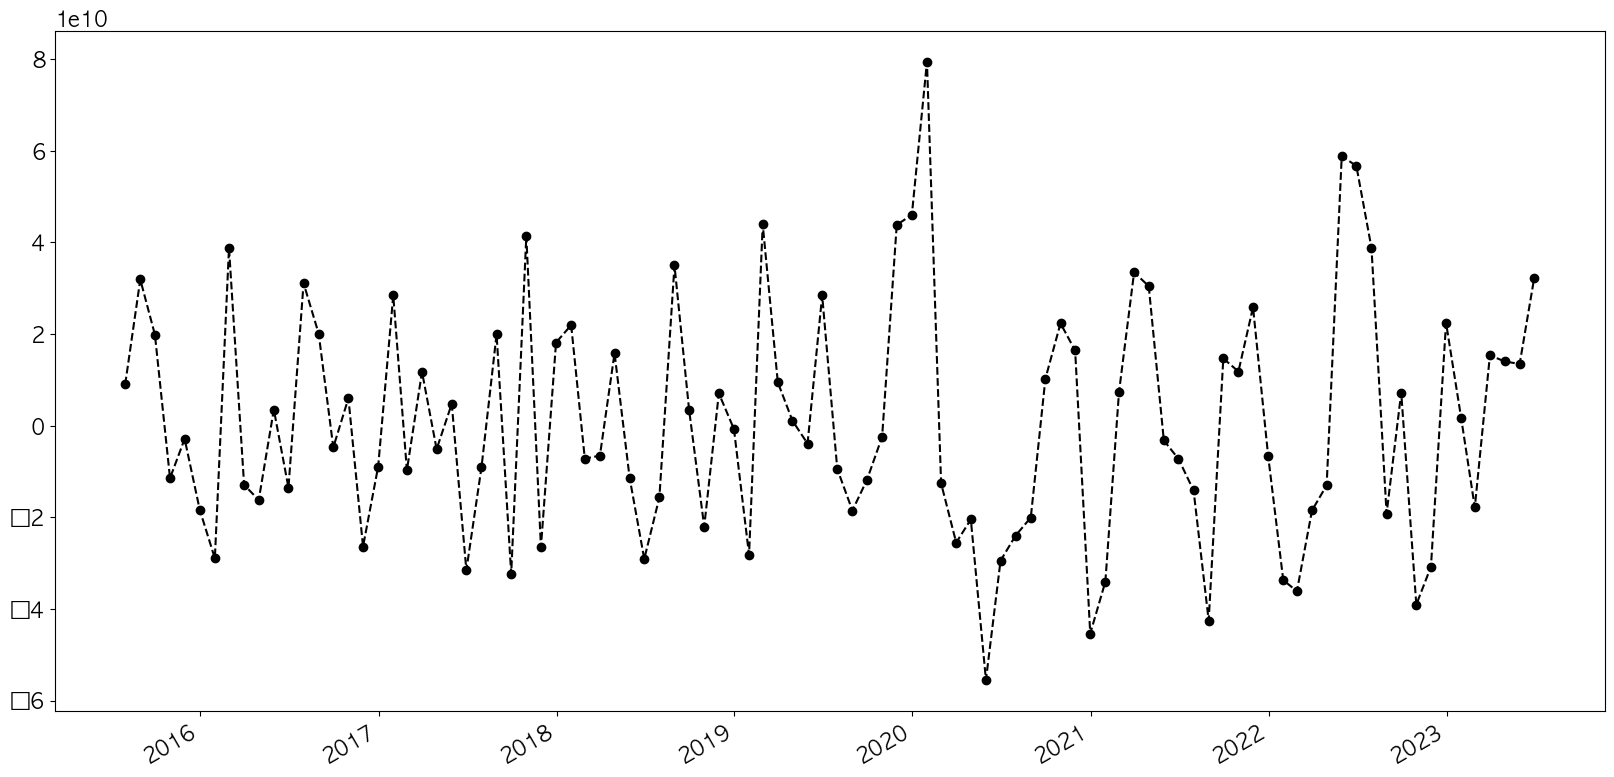

In [110]:
import matplotlib.dates as mdates
import numpy as np

plt.rc('figure',figsize=(20,10))
plt.rc('font',size=15)
fig, ax = plt.subplots()

x = result.resid.index
y = result.resid.values
ax.plot_date(x, y, color='black',linestyle='--')

# 이상치를 정의하기 위한 값 계산
Q1 = np.percentile(y, 25)
Q3 = np.percentile(y, 75)
IQR = Q3 - Q1
IQR = IQR if IQR > 0 else -1 * IQR
lower = Q1 - 1.5 * IQR
higher = Q3 + 1.5 * IQR

# 이상치를 나타내는 수평선 추가
ax.axhline(y=lower, color='blue')
ax.axhline(y=higher, color='blue')

for i in range(len(y)):
    if y[i] < lower or y[i] > higher:
        ax.annotate('Anomaly', (mdates.date2num(x[i]), y[i]), xytext=(30, 20), textcoords='offset points', color='red',arrowprops=dict(facecolor='red',arrowstyle='fancy'))
fig.autofmt_xdate()
plt.show()